In [33]:
# feature: cân nặng 
# target: chiều cao

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('SOCR-HeightWeight.csv')

df.info()

df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


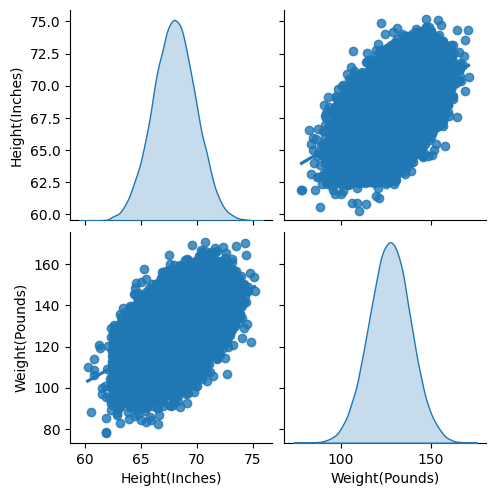

In [34]:
sns.pairplot(df[['Height(Inches)','Weight(Pounds)']], 
             diag_kind='kde', kind='reg')
plt.show()

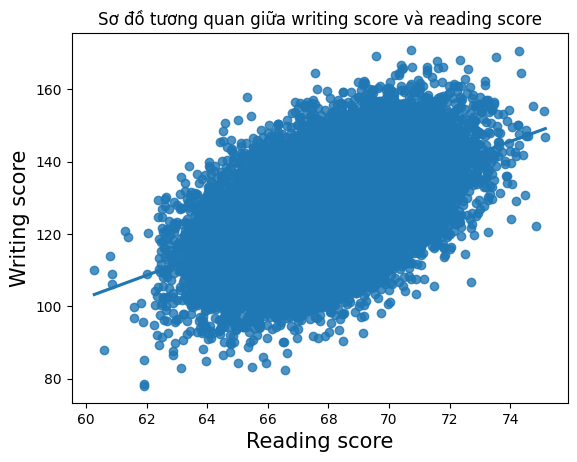

In [35]:
sns.regplot(x=df['Height(Inches)'], y=df['Weight(Pounds)'], ci=None)
plt.xlabel('Reading score', fontsize=15)
plt.ylabel('Writing score', fontsize=15)
plt.title("Sơ đồ tương quan giữa writing score và reading score")
plt.show()

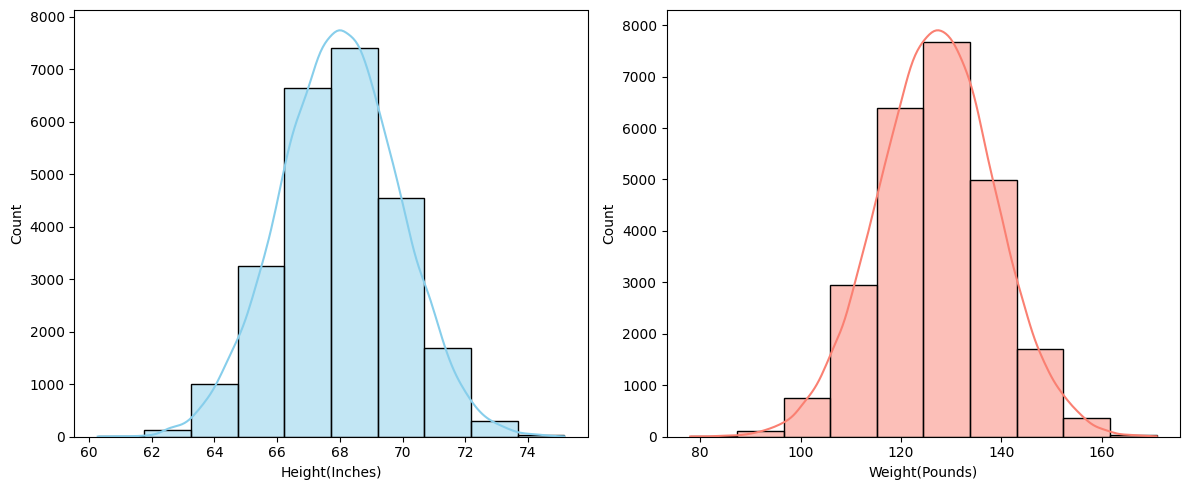

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Height(Inches)'], bins=10, kde=True, color='skyblue', ax=axes[0])

sns.histplot(df['Weight(Pounds)'], bins=10, kde=True, color='salmon', ax=axes[1])

plt.tight_layout()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X = df[['Weight(Pounds)']].values.astype(float)
y = df[['Height(Inches)']].values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [39]:
print(model.intercept_) 
#b0 - hệ số tự do


print(model.coef_)
#b1 - hệ số gốc

[57.60962063]
[[0.08168772]]


In [41]:
import numpy as np
from sklearn import metrics

# Tính giá trị dự báo ProfitRate dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Điểm R square thấp cho thấy mô hình dự đoán sai lệch nhiều. Điều này có thể là sự tương quan giữa các biến đầu vào và đầu ra chưa cao. 
# Điểm RSME thấp cho thấy kết quả dự đoán và giá trị thực tế chênh lệch khoảng 1.65 đơn vị.

Score or R-Squared: 0.26055631630450127
Root Mean Squared Error: 1.6507461482811452
